#**Yulu Business Case - Hypothesis Testing**

#**About Yulu :**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

#**Problem Statement :**

**The company wants to know:**
*  Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
*  How well those variables describe the electric cycle demands

#**Column Profiling :**


*  datetime: datetime
*  season: season (1: spring, 2: summer, 3: fall, 4: winter)
*  holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
*  workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
*  weather:
    *  1: Clear, Few clouds, partly cloudy, partly cloudy
    *  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    *  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    *  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
*  temp: temperature in Celsius
*  atemp: feeling temperature in Celsius
*  humidity: humidity
*  windspeed: wind speed
*  casual: count of casual users
*  registered: count of registered users
*  count: count of total rental bikes including both casual and registered


#**Importing libraries and Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#**Observations from the dataset**

In [ ]:
data.shape

(10886, 12)

In [ ]:
data.ndim

2

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
data.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
data.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


In [ ]:
data.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [ ]:
data['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


In [ ]:
data['holiday'].value_counts()

,count
holiday,
0,10575
1,311


In [ ]:
data['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


In [ ]:
data['workingday'].value_counts()

,count
workingday,
1,7412
0,3474


Working day there is more demand

In [ ]:
data['registered'].sum()

1693341

#**Univariate Analysis**

In [ ]:
cat_cols=['season','workingday','holiday','weather']

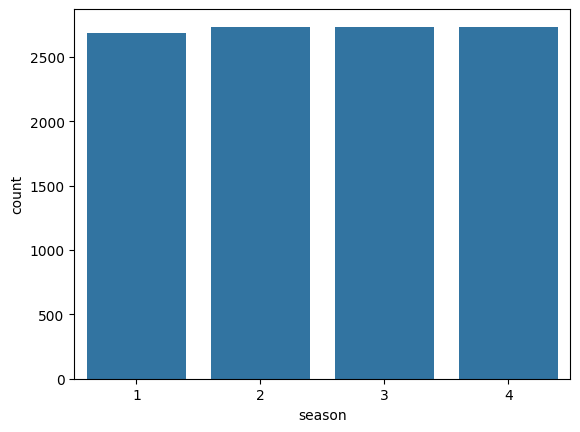

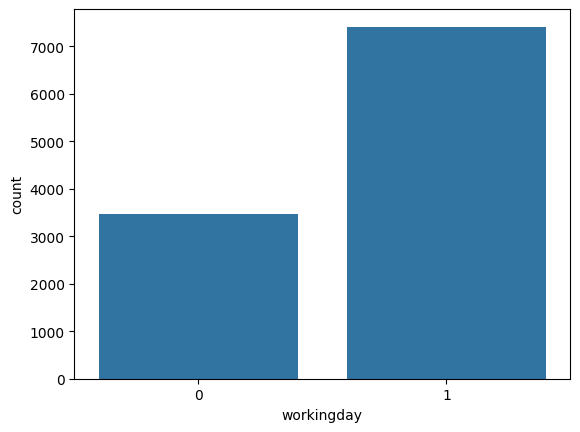

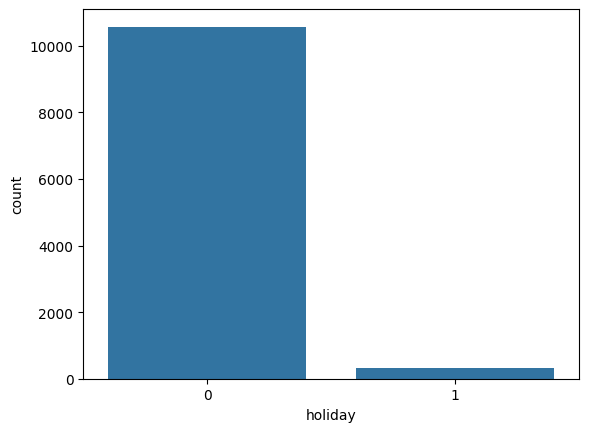

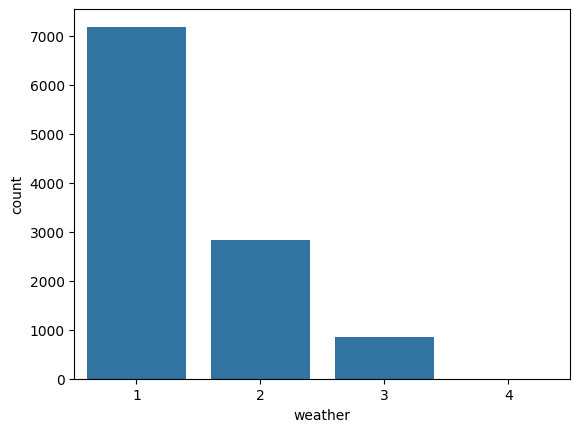

In [ ]:
for i in cat_cols:
    sns.countplot(x=i,data=data)
    plt.show()

Insights from Univariate Analysis

1. The data contains more no of working days when compared to Non Working Days

2. Weather from Category 1 were the most found in the data followed by Category 2 & 3.

<Axes: xlabel='workingday', ylabel='count'>

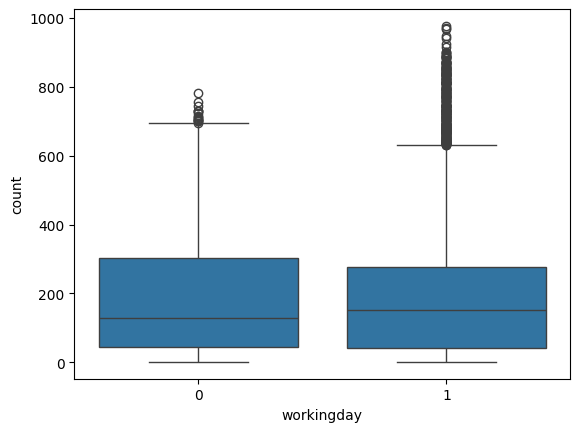

In [ ]:
sns.boxplot(x='workingday',y='count',data=data)

# Outliers
Removing outliers from the sample removes extreme conditions of the population. Removing outliers from the sensitive data may cause a problem. Hence while do hypothesis it is better to have outliers

#**Bivariate Analysis**

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


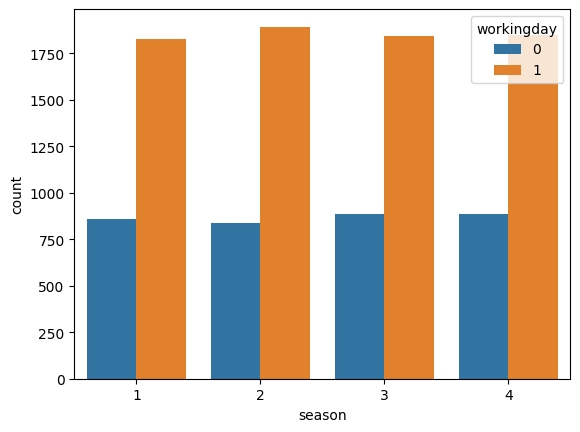

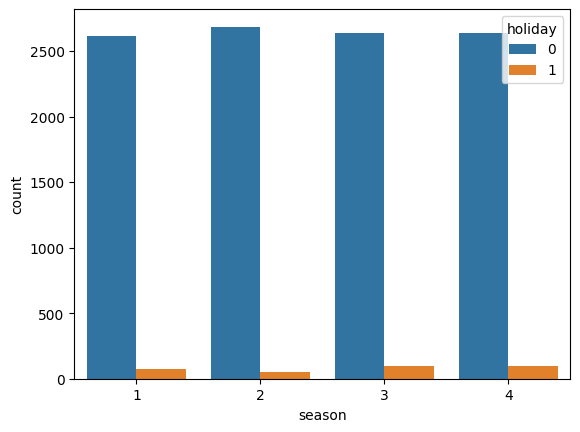

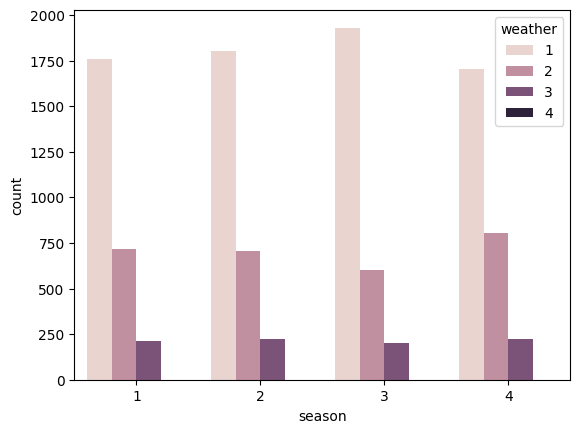

In [ ]:
cols=['workingday','holiday','weather']
for i in cols:
  sns.countplot(x='season',hue=i,data=data)
  plt.show()

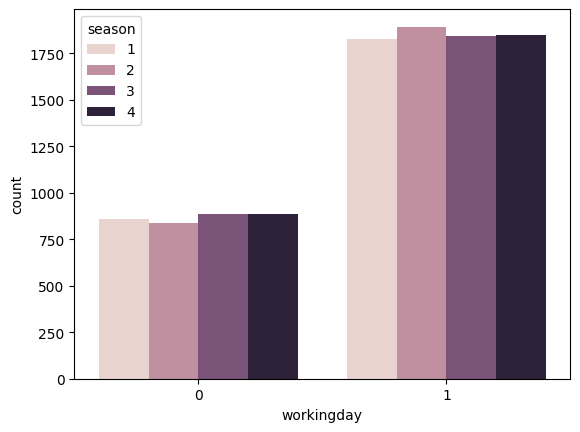

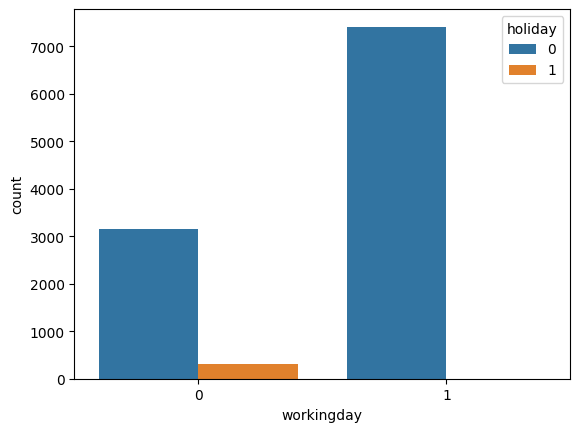

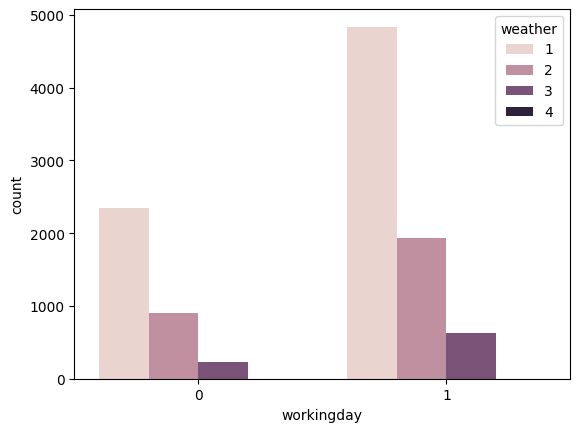

In [ ]:
cols=['season','holiday','weather']
for i in cols:
  sns.countplot(x='workingday',hue=i,data=data)
  plt.show()

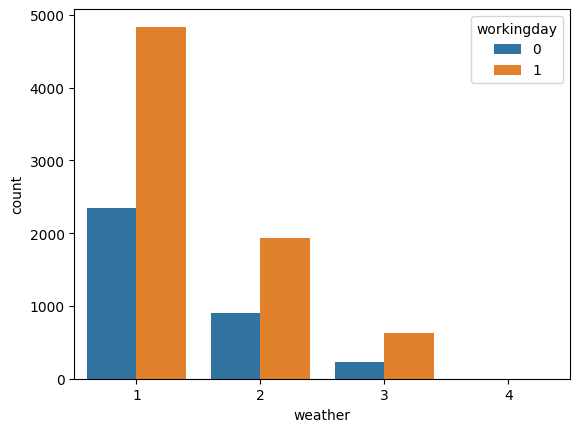

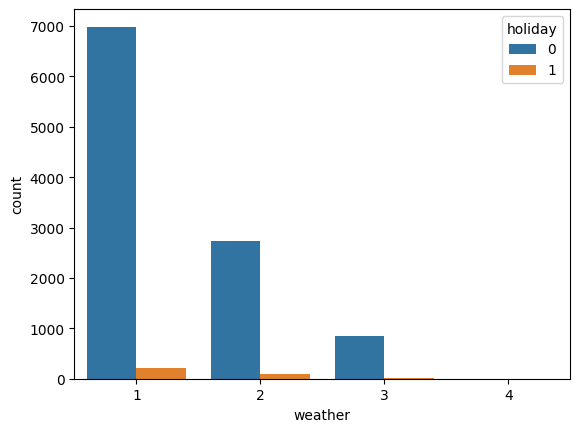

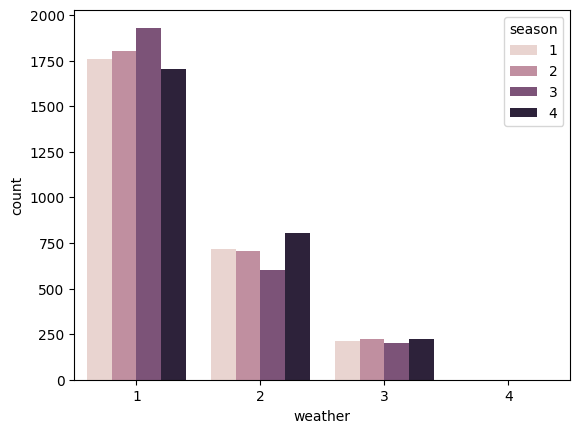

In [ ]:
cols=['workingday','holiday','season']
for i in cols:
  sns.countplot(x='weather',hue=i,data=data)
  plt.show()

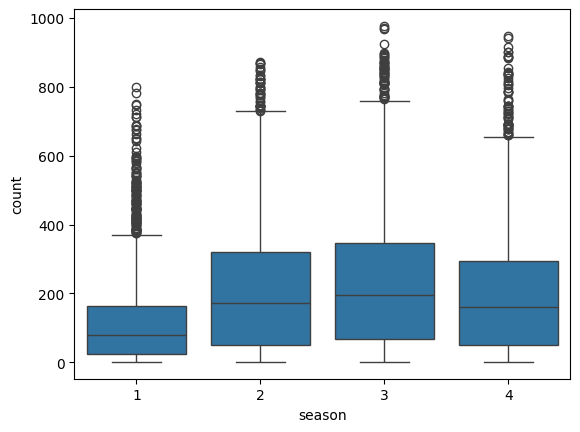

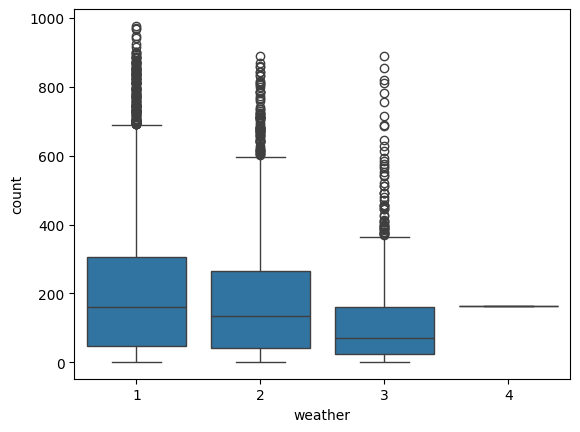

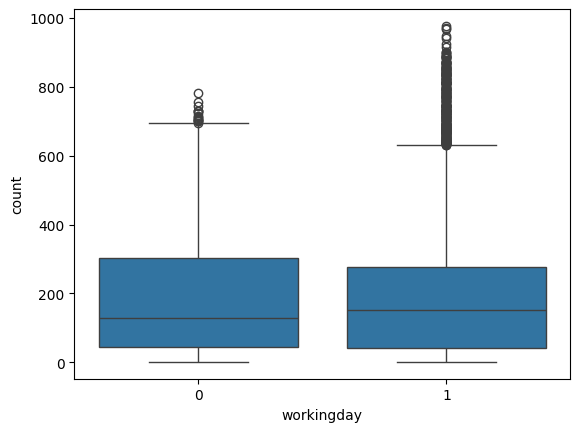

In [ ]:
sns.boxplot(x='season',y='count',data=data)
plt.show()
sns.boxplot(x='weather',y='count',data=data)
plt.show()
sns.boxplot(x='workingday',y='count',data=data)
plt.show()

Insights from Bivariate Analysis between Count & Season

The season 1 contains more outliers and the medians between the season 2,3 and 4 were siimilar.

The medians os weather 1 & 2 were almost equal.

The medians of Working Day and Non Working Day were equal.




---



#**Hypothesis Test between Working Day (independent) and Count (dependent)**

In [ ]:
Workingday=data[data['workingday']==1]['count'].sample(3000)
Non_Workingday=data[data['workingday']==0]['count'].sample(3000)


In [ ]:
print(Workingday.std())
print(Non_Workingday.std())

184.95826682446796
172.86010269107027


In [ ]:
from scipy.stats import shapiro

In [ ]:
test_stat,pvalue1= shapiro(Workingday)
print(pvalue1)

1.2733833206297761e-44


In [ ]:
if pvalue1>0.05:
    print('Data is normally distributed')
else:
    print('Data is not normally distributed')

Data is not normally distributed


In [ ]:
test_stat,pvalue2= shapiro(Non_Workingday)
print(pvalue2)
if pvalue1>0.05:
    print('Data is normally distributed')
else:
    print('Data is not normally distributed')

1.3192108255182832e-42
Data is not normally distributed


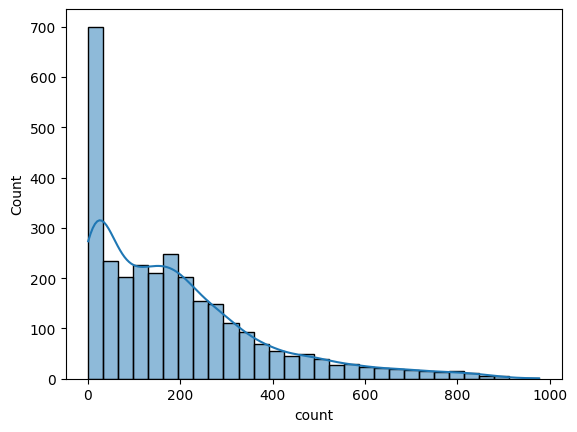

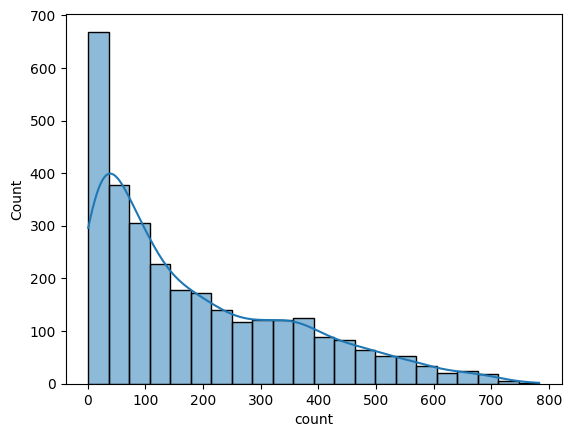

In [ ]:
cols=[Workingday,Non_Workingday]
for i in cols:
  sns.histplot(i,kde=True)
  plt.show()

**Step1: Defining Alternate and Null Hypothesis**

Null Hypothesis (Ho) : The mean count on the Workingday is equal to the mean count of Non_Working day.


Alternate Hypothesis (Ha) : The mean count on the Workingday is not equal to the mean count of Non_Workingday.


**Step-2: Choosing Appropriate test**

Here we are using Two Sample T-Test

**Step-3: Choosing Significance level**

Here we are aiming for 95% confidence, hence alpha=0.05

**Step-4: Perform the test and determine the pvalue**

In [ ]:
from scipy.stats import ttest_ind
tstat,pvalue=ttest_ind(Workingday,Non_Workingday,alternative='two-sided')
print(pvalue)

0.30614752691239205


**Step-5: Compare the pvalue with alpha**

In [ ]:
if pvalue>0.05:
    print(f'pvalue {pvalue} is greater than alpha, we accept the null hypothesis')
else:
    print(f'pvalue {pvalue} is lesser than alpha, we reject the null hypothesis')

pvalue 0.30614752691239205 is greater than alpha, we accept the null hypothesis


##**Insights from the Testing**

**As a conclusion the mean count between the Working Day and Non Working Day were equal.**

In [ ]:
#########################################################################################3

#**Hypothesis Test between Weather (independent) and Count (dependent)**

In [ ]:
data[data['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


In [ ]:
data.drop([5631],axis=0,inplace=True)

In [ ]:
data['weather'].value_counts()


,count
weather,
1,7192
2,2834
3,859


In [ ]:
weather1=data[data['weather']==1]['count'].sample(800)
weather2=data[data['weather']==2]['count'].sample(800)
weather3=data[data['weather']==3]['count'].sample(800)

In [ ]:
tstat,pvalue=shapiro(weather1)
print(pvalue)
tstat,pvalue=shapiro(weather1)
print(pvalue)
tstat,pvalue=shapiro(weather1)
print(pvalue)

4.34050797204664e-23
4.34050797204664e-23
4.34050797204664e-23


As the pvalue is less than alpha(0.05), the distribution is not normal.

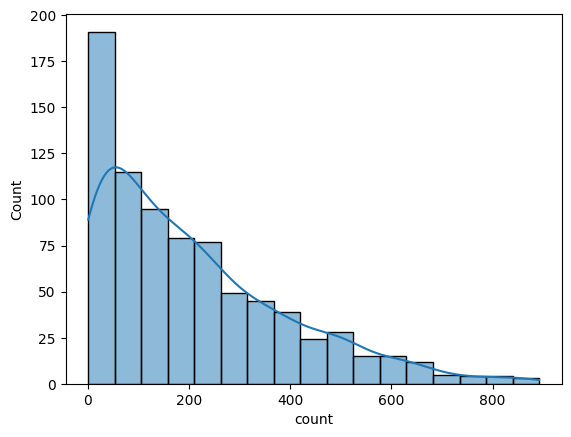

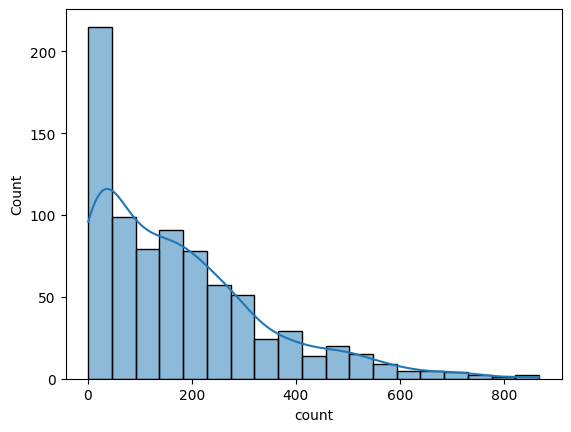

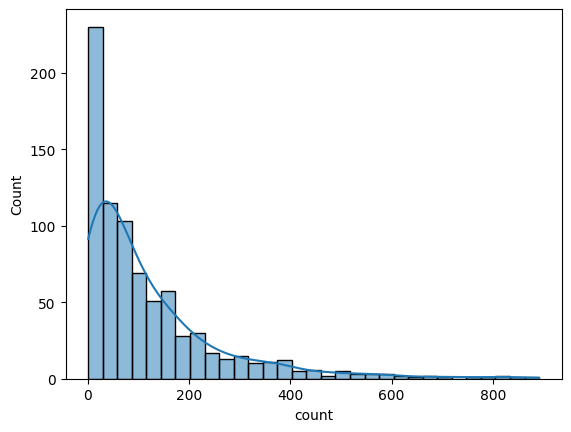

In [ ]:
cols=[weather1,weather2,weather3]
for i in cols:
  sns.histplot(i,kde=True)
  plt.show()

Checking for variance

In [ ]:
from scipy.stats import levene
stat,pvalue=levene(weather1,weather2,weather3)
print(pvalue)

1.417646661847725e-17


As the pvalue is less than alpha, it states that variance is significantly different among groups.

**Step1: Defining Alternate and Null Hypothesis**

Null Hypothesis (Ho) : The median counts of all the weather are equal.


Alternate Hypothesis (Ha) : Atleast one of the weather's median count is different


**Step-2: Choosing Appropriate test**

As it is failing for the assumptions we cannot use One-way Anova. So we are using Kruskal-Wallis test.

**Step-3: Choosing Significance level**

Here we are aiming for 95% confidence, hence alpha=0.05

**Step-4: Perform the test and determine the pvalue**

In [ ]:
from scipy.stats import kruskal
stat,pvalue=kruskal(weather1,weather2,weather3)
print(pvalue)

2.8739227393795696e-27


**Step-5: Compare the pvalue with alpha**

In [ ]:
if pvalue>0.05:
    print(f'pvalue {pvalue} is greater than alpha, we accept the null hypothesis')
else:
    print(f'pvalue {pvalue} is lesser than alpha, we reject the null hypothesis')

pvalue 2.8739227393795696e-27 is lesser than alpha, we reject the null hypothesis


##**Insights from the Testing**

**As a conclusion the median count between different Weather Categories were different.**

In [ ]:
################################################################################333

#**Hypothesis Test between Seasons (independent) and Count (dependent)**

In [ ]:
data['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2685


In [ ]:
Season1=data[data['season']==1]['count'].sample(2500)
Season2=data[data['season']==2]['count'].sample(2500)
Season3=data[data['season']==3]['count'].sample(2500)
Season4=data[data['season']==4]['count'].sample(2500)

In [ ]:
tstat,pvalue=shapiro(Season1)
print(pvalue)
tstat,pvalue=shapiro(Season2)
print(pvalue)
tstat,pvalue=shapiro(Season3)
print(pvalue)
tstat,pvalue=shapiro(Season4)
print(pvalue)

2.5127894407619837e-47
2.2167613911197442e-37
2.451460577249318e-35
2.0045225695297553e-38


The data's are not normally distributed.

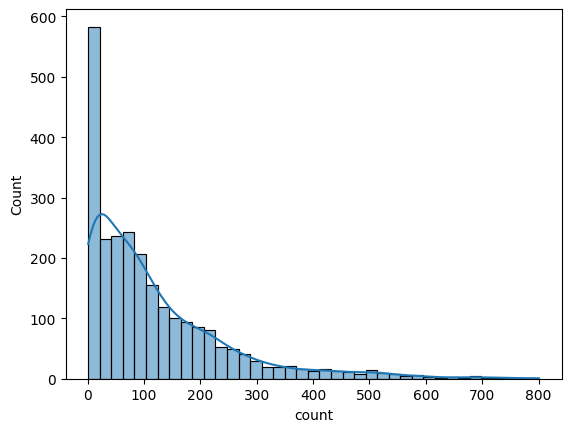

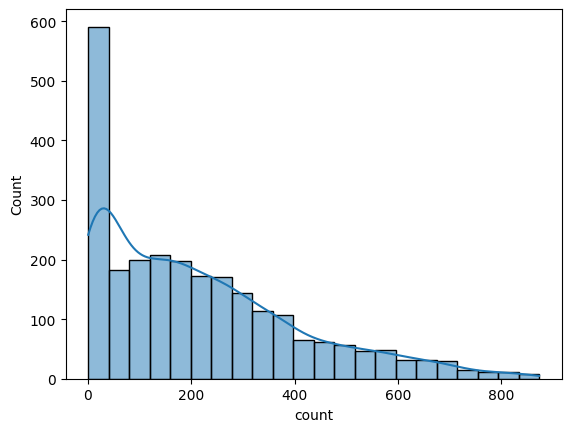

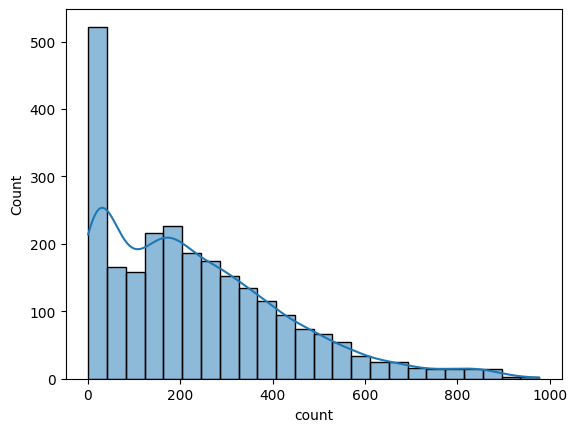

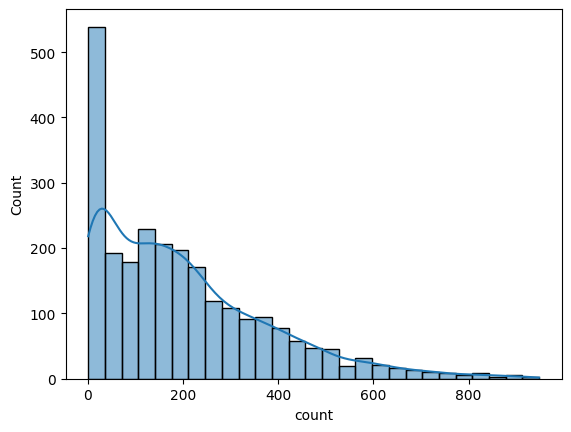

In [ ]:
cols=[Season1,Season2,Season3,Season4]
for i in cols:
  sns.histplot(i,kde=True)
  plt.show()

In [ ]:
# Performing leven test for variance.
stat,pvalue=levene(Season1,Season2,Season3,Season4)
print(pvalue)

1.5178353739788809e-108


pvalue is less than alpha. Variance among groups are statistically different.

**Step1: Defining Alternate and Null Hypothesis**

Null Hypothesis (Ho) : The median counts of all the Seasons are equal.

Alternate Hypothesis (Ha) : Atleast one of the Season's median count is different

**Step-2: Choosing Appropriate test**

As it is failing for the assumptions we cannot use One-way Anova. So we are using Kruskal-Wallis test.

**Step-3: Choosing Significance level**

Here we are aiming for 95% confidence, hence alpha=0.05

**Step-4: Perform the test and determine the pvalue**

In [ ]:
stat,pvalue=kruskal(Season1,Season2,Season3,Season4)
print(pvalue)

1.3348093037480505e-136


**Step-5: Compare the pvalue with alpha**

In [ ]:
if pvalue>0.05:
    print(f'pvalue {pvalue} is greater than alpha, we accept the null hypothesis')
else:
    print(f'pvalue {pvalue} is lesser than alpha, we reject the null hypothesis')

pvalue 1.3348093037480505e-136 is lesser than alpha, we reject the null hypothesis


##**Insights from the Testing**

**As a conclusion the median count between different Season were not equal.**

#**Hypothesis Test between Weather (independent) and Season (independent)***

In [ ]:
Weather_Season=pd.crosstab(data['weather'],data['season'])
Weather_Season

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225


**Step1: Defining Alternate and Null Hypothesis**

Null Hypothesis (Ho) : Season and Weather are independent and there is no relation between them.

Alternate Hypothesis (Ha) : Season and Weather are dependent to each other and there is a relation.

**Step-2: Choosing Appropriate test**

Since we are performing tests on two categorical variables, we are using Chi-Squared test.

**Step-3: Choosing Significance level**

Here we are aiming for 95% confidence, hence alpha=0.05

**Step-4: Perform the test and determine the pvalue**

In [ ]:
from scipy.stats import chi2_contingency
stat,pvalue,dof,expected_freq=chi2_contingency(Weather_Season)
print(pvalue)

2.8260014509929403e-08


**Step-5: Compare the pvalue with alpha**

In [ ]:
if pvalue>0.05:
    print(f'pvalue {pvalue} is greater than alpha, we accept the null hypothesis')
else:
    print(f'pvalue {pvalue} is lesser than alpha, we reject the null hypothesis')

pvalue 2.8260014509929403e-08 is lesser than alpha, we reject the null hypothesis


##**Insights from the Testing**

**As a conclusion there is relation between Weather and Season, where they are dependent to each other.**

#**Insights from the Overall Analysis**

1.   More number of bike rents are made during Fall season and least in Spring Season.
1.   Bikes are being rented equally on both Working and Non-Working Days
2.   Seasons are Weather dependent on each other.
2.   Bikes are rented out during when the weather was Clear, Few clouds, partly cloudy, partly cloudy
1.   During weather such as Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog renting bikes were less.






#**Recommendations from the Business Case**

1.   Make bikes more available during fall season and when the weather is more clear or partly clouds.
2.   Bikes renting are less during rainy season, hence try to make bikes which can ber more stable during raining time. Change the tires which will make sure the customer safety
2.   Unique users are more from Registered user rather from Casual user.
1.   Provide membership and other such plans for casual user. So that they can be converted into registered users
2.   Provide Support and get feedback from the registered users. Make sure the feedbacks are taken into account and steps are taken.




